# Install Libraries

In [1]:
%pip -q install kagglehub

# Read Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

# Assuming the dataset downloaded to the path variable
# The actual file name might be different, adjust if needed
path = kagglehub.dataset_download("ashishsahani/hospital-admissions-data")
files = os.listdir(path)
print(files)
print("Path to dataset files:", path)

['HDHI Admission data.csv', 'HDHI Mortality Data.csv', 'table_headings.csv', 'HDHI Pollution Data.csv']
Path to dataset files: /kaggle/input/hospital-admissions-data


## Print data information

In [3]:
df = pd.read_csv(os.path.join(path, "HDHI Admission data.csv"))

print(df.head())

#df.columns.to_list()

#print(df.info())

   SNO MRD No.     D.O.A      D.O.D  AGE GENDER RURAL  \
0    1  234735  4/1/2017   4/3/2017   81      M     R   
1    2  234696  4/1/2017   4/5/2017   65      M     R   
2    3  234882  4/1/2017   4/3/2017   53      M     U   
3    4  234635  4/1/2017   4/8/2017   67      F     U   
4    5  234486  4/1/2017  4/23/2017   60      F     U   

  TYPE OF ADMISSION-EMERGENCY/OPD month year  DURATION OF STAY  ...  \
0                               E     Apr-17                 3  ...   
1                               E     Apr-17                 5  ...   
2                               E     Apr-17                 3  ...   
3                               E     Apr-17                 8  ...   
4                               E     Apr-17                23  ...   

   CONGENITAL UTI  NEURO CARDIOGENIC SYNCOPE  ORTHOSTATIC  \
0           0   0                          0            0   
1           0   0                          0            0   
2           0   0                          0   

### 1. What is the total number of admissions?

In [4]:
total_admissions = len(df)
print(f"1. Total number of admissions: {total_admissions}\n")

1. Total number of admissions: 15757



### 2. What is the distribution of gender among admitted patients?

In [5]:
gender_distribution = df['GENDER'].value_counts()
print("2. Distribution of gender:\n", gender_distribution, "\n")

2. Distribution of gender:
 GENDER
M    9990
F    5767
Name: count, dtype: int64 



### 3. Which age group is most frequently admitted?

In [6]:
most_frequent_age = df['AGE'].value_counts().idxmax()
print(f"3. Age group most frequently admitted (most frequent individual age): {most_frequent_age}\n")

3. Age group most frequently admitted (most frequent individual age): 65



### 4. What are the most common admission types?

In [7]:
most_common_admission_types = df['TYPE OF ADMISSION-EMERGENCY/OPD'].value_counts()
print("4. Most common admission types:\n", most_common_admission_types, "\n")

4. Most common admission types:
 TYPE OF ADMISSION-EMERGENCY/OPD
E    10924
O     4833
Name: count, dtype: int64 



### 5. Which departments have the highest number of admissions?

In [8]:
if 'DURATION OF STAY' in df.columns:
    departments_admissions = df['DURATION OF STAY'].value_counts()
    print("5. Departments with the highest number of admissions:\n", departments_admissions, "\n")
else:
    print("5. The dataset does not contain a direct 'department' column as described in the assignment. A suitable proxy column was not identified.\n")


5. Departments with the highest number of admissions:
 DURATION OF STAY
2     2109
5     1904
3     1878
4     1836
6     1623
7     1294
8     1069
9      732
1      582
10     579
11     448
12     351
13     270
14     188
15     158
16     118
17      91
18      76
19      73
20      63
22      41
21      40
24      28
26      23
23      22
29      20
25      19
28      17
27      13
31      12
32      11
36       9
33       9
41       7
38       5
52       4
35       4
37       4
30       4
48       3
34       2
47       2
44       2
42       2
39       2
50       2
46       2
53       1
45       1
49       1
98       1
58       1
67       1
Name: count, dtype: int64 



### 6. What room type is most frequently assigned?

In [9]:
if 'duration of intensive unit stay' in df.columns:
    most_frequent_room_type = df['duration of intensive unit stay'].value_counts()
    print("6. Most frequently assigned room type:\n", most_frequent_room_type, "\n")
else:
    print("6. The dataset does not contain a direct 'room_type' column as described in the assignment.\n")


6. Most frequently assigned room type:
 duration of intensive unit stay
0     2761
2     2620
3     1928
4     1762
1     1707
5     1532
6      918
7      637
8      476
9      341
10     227
11     165
12     150
13      87
14      69
15      69
16      57
18      43
17      33
20      28
22      25
19      22
24      16
21      11
26      11
30       7
27       6
23       6
32       6
28       5
29       5
25       5
31       4
35       3
36       2
37       2
48       2
40       2
45       1
42       1
39       1
34       1
58       1
41       1
38       1
Name: count, dtype: int64 



### 7. On which day of the week do most patients get admitted?

In [10]:
# most_admissions_day = df['month year'].value_counts().idxmax()
# print(f"7. On which day of the week do most patients get admitted: {most_admissions_day}\n")
df['D.O.A'] = pd.to_datetime(df['D.O.A'], format='mixed')
df['admission_day_of_week'] = df['D.O.A'].dt.day_name()
most_common_admission_day = df['D.O.A'].dt.day_name().value_counts().idxmax()
print(f'\n7. Most common admission day of the week: {most_common_admission_day}')


7. Most common admission day of the week: Monday


### 8. What percentage of patients have visited before (previous_visits > 0)?

In [11]:
if 'previous_visits' in df.columns:
    total_admissions = len(df)
    patients_with_previous_visits = df[df['previous_visits'] > 0]
    percentage_with_previous_visits = (len(patients_with_previous_visits) / total_admissions) * 100
    print(f"8. Percentage of patients who have visited before (previous_visits > 0): {percentage_with_previous_visits:.2f}%\n")
else:
    print("8. Cannot answer: The dataset does not contain a direct 'previous_visits' column as described in the assignment.\n")


8. Cannot answer: The dataset does not contain a direct 'previous_visits' column as described in the assignment.



### 9. Is there a difference in admission types across genders?

In [12]:
admission_type_gender_crosstab = pd.crosstab(df['GENDER'], df['TYPE OF ADMISSION-EMERGENCY/OPD'])
print('\n9. Admission types across genders:')
print(admission_type_gender_crosstab.to_markdown(numalign="left", stralign="left"))


9. Admission types across genders:
| GENDER   | E    | O    |
|:---------|:-----|:-----|
| F        | 4055 | 1712 |
| M        | 6869 | 3121 |


## 10. Create 3 visualizations to represent interesting patterns in the data.

### **Visualization 1: Distribution of Gender**

/tmp/ipython-input-13-3680325006.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='GENDER', palette='viridis')


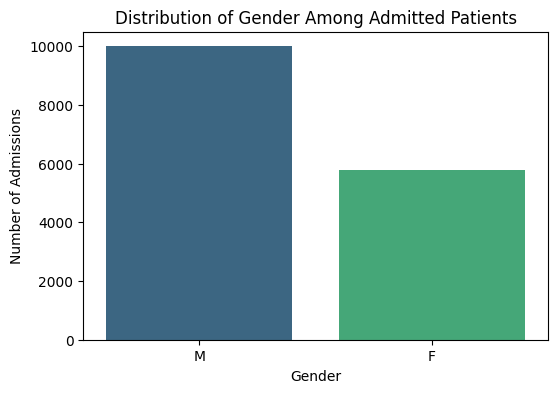

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='GENDER', palette='viridis')
plt.title('Distribution of Gender Among Admitted Patients')
plt.xlabel('Gender')
plt.ylabel('Number of Admissions')
plt.show()


### **Visualization 2: Distribution of Age Groups**

In [14]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']
df['age_group'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)
most_frequent_age_group = df['age_group'].value_counts().idxmax()
print(f'\n3. Most frequently admitted age group: {most_frequent_age_group}')


3. Most frequently admitted age group: 60-69


/tmp/ipython-input-15-100692929.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['age_group'], palette='magma', order=age_labels)


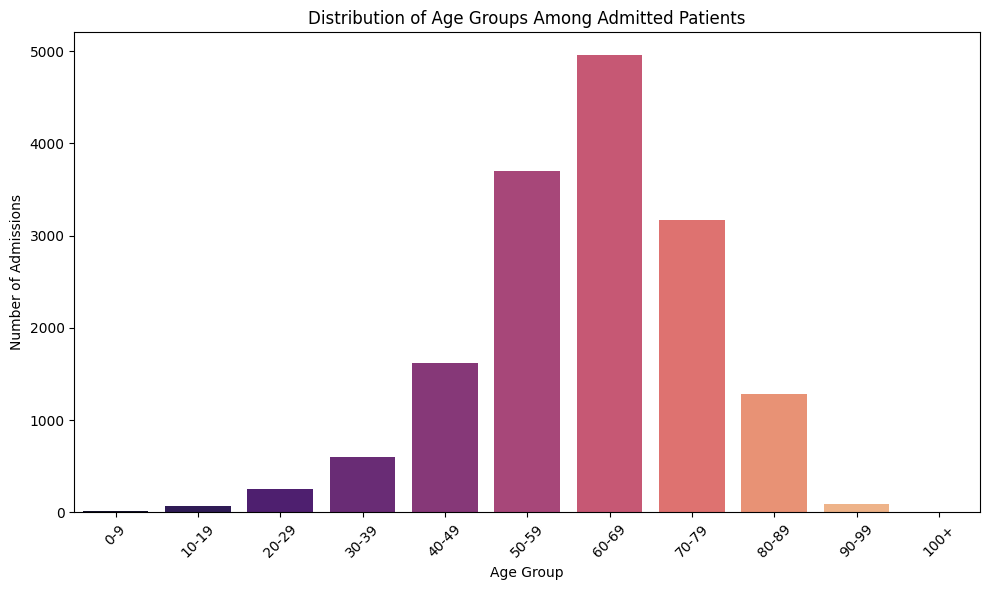

In [15]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['age_group'], palette='magma', order=age_labels)
plt.title('Distribution of Age Groups Among Admitted Patients')
plt.xlabel('Age Group')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('age_group_distribution.png')
#print('Visualization 2: age_group_distribution.png (Distribution of Age Groups Among Admitted Patients)')

### **Visualization 3: Admissions by Day of the Week**

Visualization 3: admission_type_by_gender.png (Admission Types by Gender)


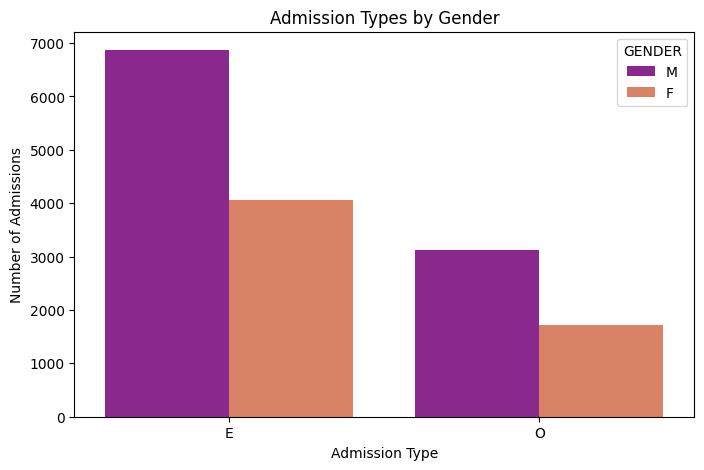

In [19]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['admission_type'] = df['TYPE OF ADMISSION-EMERGENCY/OPD'].str.strip().str.upper()
df['admission_day'] = pd.Categorical(df['TYPE OF ADMISSION-EMERGENCY/OPD'], categories=day_order, ordered=True)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='TYPE OF ADMISSION-EMERGENCY/OPD', hue='GENDER', palette='plasma')
plt.title('Admission Types by Gender')
plt.xlabel('Admission Type')
plt.ylabel('Number of Admissions')
plt.savefig('admission_type_by_gender.png')
print('Visualization 3: admission_type_by_gender.png (Admission Types by Gender)')